# 大盘拥挤率

A股拥挤率指标，就是计算A股成交额排名前5%的股票合计成交额占比全市场成交额的比值，超过50%时，算比较拥挤，适当减仓

![广发证券原指标定义](https://image.joinquant.com/47682de8924f5f62b9c2249a0fe9016b)

指标出处来自广发，通过这一指标来判断市场微观机构是否恶化

In [1]:
from jqdata import *
import datetime
import pandas as pd

In [16]:
date_now = datetime.date(2021, 2, 1)
# 往前推多少天
days = 500

CPU times: user 9.03 s, sys: 275 ms, total: 9.3 s
Wall time: 9.39 s


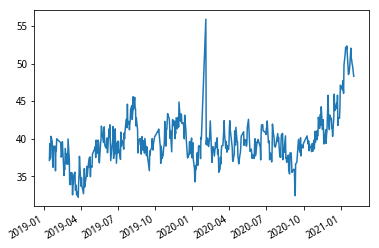

In [17]:
%%time
trade_day = get_trade_days(end_date=date_now, count=1)[-1]
all_stocks = list(get_all_securities(date=trade_day).index)

h = get_price(all_stocks, end_date=trade_day, frequency='1d', fields='money',
                  count=days, panel=False
             ).pivot(index='code',columns='time',values='money')
#
dict_crowd = {}
for day in h.columns:
    s2 = h[day].dropna().sort_values(ascending=False)
    dict_crowd[day] = (100 * s2.iloc[:len(s2)//20].sum()) / s2.sum()
#
s_crowd = pd.Series(dict_crowd)
s_crowd.plot()

In [14]:
# 历史最大值
# s_crowd[s_crowd>=55]
s_crowd.index[s_crowd.values.argmax()]

Timestamp('2021-02-10 00:00:00')

In [15]:
# 历史最小值
# s_crowd[s_crowd<=33]
s_crowd.index[s_crowd.values.argmin()]

Timestamp('2020-09-10 00:00:00')